714
crossentropy
0.8263305322128851
[[0.55702575 0.44297425]] [0. 1.]
[[0.90468578 0.09531422]] [1. 0.]
[[0.12285221 0.87714779]] [0. 1.]
[[0.94751482 0.05248518]] [1. 0.]
[[0.9389288 0.0610712]] [0. 1.]
[[0.49146128 0.50853872]] [1. 0.]
[[0.91445679 0.08554321]] [1. 0.]
[[0.53377117 0.46622883]] [1. 0.]
[[0.43969643 0.56030357]] [0. 1.]
[[0.93881075 0.06118925]] [1. 0.]
[[0.97665918 0.02334082]] [1. 0.]
[[0.10636703 0.89363297]] [0. 1.]
[[0.87596948 0.12403052]] [1. 0.]
[[0.66291714 0.33708286]] [1. 0.]
[[0.76695851 0.23304149]] [1. 0.]
[[0.88770098 0.11229902]] [1. 0.]
[[0.86740677 0.13259323]] [1. 0.]
[[0.1049479 0.8950521]] [0. 1.]
[[0.79543855 0.20456145]] [1. 0.]
[[0.60015247 0.39984753]] [0. 1.]
[[0.59718609 0.40281391]] [0. 1.]
[[0.6205676 0.3794324]] [1. 0.]
[[0.89497342 0.10502658]] [1. 0.]
[[0.85822486 0.14177514]] [1. 0.]
[[0.20702099 0.79297901]] [0. 1.]
[[0.33954439 0.66045561]] [0. 1.]
[[0.0379879 0.9620121]] [0. 1.]
[[0.0192812 0.9807188]] [0. 1.]
[[0.07891973 0.9210802

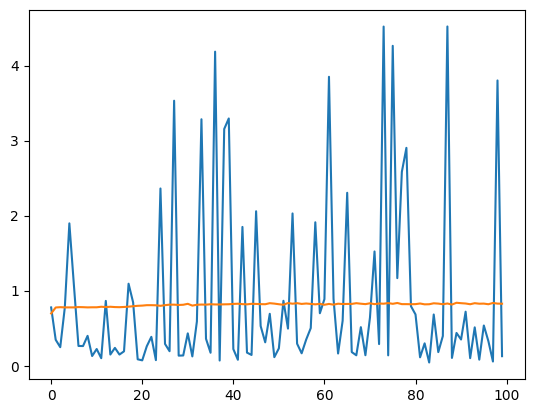

In [2]:
import numpy as np
from ClassModules import *

from pandas import DataFrame

data = np.genfromtxt("datasets/train_titanic.csv", delimiter=",")
dataset = []

raw_pyhton_dataset = []


for row in data[1:]:
    raw_pyhton_dataset.append([row[2]/3, row[4], row[5] / 50, row[9] / 100, int(row[1])])


raw_dataset = DataFrame(raw_pyhton_dataset)
res = raw_dataset.dropna(axis=0)
res = res.to_numpy()

for i in range(714):
    row = res[i]
    data = [0., 0.]
    data[int(row[4])] = 1.0
    # data = 0.0
    # if int(row[4]):
    #     data = 1.0
    out = np.array(data)
    dataset_row = [np.array([[row[0], row[1], row[2], row[3]]]),  np.array(out)]
    
    dataset.append( dataset_row )
    # print([np.array([row[0], row[1], row[2], row[3]]), np.array([row[3]]) ] )
# print(raw_dataset)

# for i in res[:10]:
#     print(res[i])
    
print(len(dataset))

model = Sequential('adam', [Dense(20, relu, input_shape=4), Dense(10, relu), Dense(2, softmax)], ALPHA=0.001)
loss_arr, accuracy_arr = model.fit(dataset, need_calculate_loss=True, need_calculate_accuracy=True, num_epochs=100)
print(model.calc_accuracy(dataset))

for i in range(30):
    print(model.predict(dataset[i][0]), dataset[i][1])

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.plot(accuracy_arr)    
plt.show()

In [3]:
from PIL import Image, ImageDraw, ImageFont

In [4]:
denses = model.layers
table_data = []
for i in range(len(denses)):
    dense = denses[i]

    if dense.prev_layer.__class__.__name__ == "InputLayer":
        layer_input = []
        layer_output = []
        
        layer_input.append('dense_input')
        layer_input.append("input:")
        layer_input.append([None, dense.prev_layer.get_outs_number()])
    
        layer_output.append(dense.prev_layer.__class__.__name__)
        layer_output.append('output:')
        layer_output.append([None, dense.prev_layer.get_outs_number()])
        
        table_data.append(layer_input)
        table_data.append(layer_output)

    layer_input = []
    layer_output = []

    layer_input.append('dense' if i == 0 else f'dense_{i}')
    layer_input.append("input:")
    layer_input.append([None, dense.prev_layer.get_outs_number()])

    layer_output.append(dense.__class__.__name__)
    layer_output.append('output:')
    layer_output.append([None, dense.get_outs_number()])
    
    table_data.append(layer_input)
    table_data.append(layer_output)
    # print('-------------------\n',
    #       'prev_layer', dense.prev_layer,
    #       'input:', dense.prev_layer.get_outs_number(),
    #       'neurons:', dense.get_outs_number(), 
    #       '\nneurons:', dense.get_results(), dense.get_results().__class__,
    #       '\nclass:', dense.__class__.__name__,
    #       'activation:', dense.func.__name__)
    # print('\n')
    # print('bias', dense.b[0].__class__, dense.b[0])
    # denses_for_save[i]['weights'][0]['numpy'] = dense.b[0]
    # print('kernel:', dense.W)
    # denses_for_save[i]['weights'][1]['numpy'] = dense.W
    # print('\n')

In [10]:
table_data

[['dense_input', 'input:', [None, 4]],
 ['InputLayer', 'output:', [None, 4]],
 ['dense', 'input:', [None, 4]],
 ['Dense', 'output:', [None, 20]],
 ['dense_1', 'input:', [None, 20]],
 ['Dense', 'output:', [None, 10]],
 ['dense_2', 'input:', [None, 10]],
 ['Dense', 'output:', [None, 2]]]

In [5]:
image = Image.new("RGB", (0, 0), "white")
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

max_width = sum([max([draw.textsize(str(row[i]), font=font)[0] + 10 for row in table_data]) for i in range(len(table_data[0]))])
max_height = len(table_data) * 20 + ((len(table_data) // 2)-1) * 40

# Создаем новое изображение
width, height = max_width + 20, max_height + 20
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# max_len = 0
start_x, all_x, prev_all_x = 0, 0, 0
x, y = 0, 10
cell_height = 20
line_height = 20
for i in range(0, len(table_data), 2):
    rows = table_data[i:i+2]
    if not len(rows) == 0:
        column_widths = [max([draw.textsize(str(row[i]), font=font)[0] + 10 for row in rows]) for i in range(len(rows[0]))]
        all_x = sum(column_widths)
        # max_len = all_x if all_x > max_len else max_len
        if start_x == 0:
            x = (max_width - all_x) / 2 + (width - max_width) / 2
        if not prev_all_x == 0:
            center = start_local_x + (prev_all_x / 2)
            draw.line(((center, y),(center, y+line_height)), fill="black", width=1)
            draw.polygon([(center - 7, y+line_height),(center + 7, y+line_height),(center, y+line_height*2)], fill='black')
            y += line_height*2
            x = start_local_x + (prev_all_x - all_x) / 2
        start_local_x = x
        for row in rows:
            for i, cell in enumerate(row):
                draw.rectangle([x, y, x + column_widths[i], y + cell_height], outline="black")
                draw.text((x + 5, y + 5), str(cell), font=font, fill="black")
                x += column_widths[i]  
            y += cell_height
            x = start_local_x
        prev_all_x = all_x

image.save("example_table.png")
image.show()


C:\Users\kipov\AppData\Local\Temp\ipykernel_3660\2923475381.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  max_width = sum([max([draw.textsize(str(row[i]), font=font)[0] + 10 for row in table_data]) for i in range(len(table_data[0]))])
C:\Users\kipov\AppData\Local\Temp\ipykernel_3660\2923475381.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  max_width = sum([max([draw.textsize(str(row[i]), font=font)[0] + 10 for row in table_data]) for i in range(len(table_data[0]))])
C:\Users\kipov\AppData\Local\Temp\ipykernel_3660\2923475381.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  max_width = sum([max([draw.textsize(str(row[i]), font=font)[0] + 10 for row in table_data]) for i in range(len(table_data[0]))])
C:\Users\kipov\AppData\Local\Te